In [1]:
# 이 셀은 VSCode 환경 사용시에만 실행할 것!
%cd ..

c:\Users\jeong\Desktop\state-farm-distracted-driver-detection


In [2]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
from torch.utils.model_zoo import load_url as load_state_dict_from_url

from src.models.vgg import VGG11

In [3]:
MODEL_URL = "https://download.pytorch.org/models/vgg11-bbd30ac9.pth"

# 모델 생성
model = VGG11()

# pretrained weights 불러오기
state_dict_pretrained = load_state_dict_from_url(MODEL_URL, progress=True)

# weights에서 마지막 fc레이어 제거
# layer_names_last = list(model.state_dict().keys())[-2:]
# for layer_name in layer_names_last:
#     state_dict_pretrained.pop(layer_name)

# weights 적용
# state_dict = model.state_dict()
# state_dict_pretrained.update(state_dict)
model.load_state_dict(state_dict_pretrained)
# model.eval()

Downloading: "https://download.pytorch.org/models/vgg11-bbd30ac9.pth" to C:\Users\jeong/.cache\torch\hub\checkpoints\vgg11-bbd30ac9.pth
100%|██████████| 507M/507M [01:50<00:00, 4.81MB/s]


<All keys matched successfully>

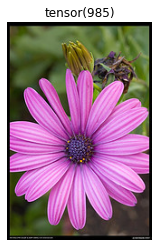

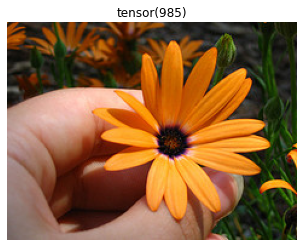

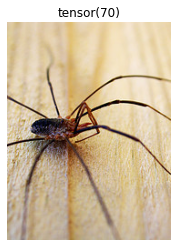

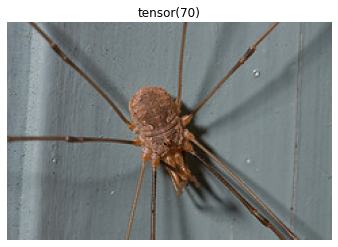

In [7]:
img_0 = Image.open("data/img0.jpg")
img_1 = Image.open("data/img1.jpg")
img_2 = Image.open("data/img2.jpg")
img_3 = Image.open("data/img3.jpg")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def visualize_prediction(img):
    x = transform(img)
    x.unsqueeze_(0)
    y = model(x)
    plt.axis('off'); plt.title(y[0].argmax()); plt.imshow(img); plt.show()

visualize_prediction(img_0)
visualize_prediction(img_1)
visualize_prediction(img_2)
visualize_prediction(img_3)